# Preparação do dataset de frutas para treinar a rede neural
### Obtenha o dataset no Kaggle: https://www.kaggle.com/moltean/fruits/kernels
### Este script assume que a pasta fruits-360 está localizada no mesmo diretório que ele

In [4]:
import os
import json

# Quantidade de imagens para cada fruta

In [5]:
pasta_treinamento = 'fruits-360/Training/'

In [10]:
quantidades_treinamento = {}
for fruta in os.listdir(pasta_treinamento):
    quantidades_treinamento[fruta] = len(os.listdir(pasta_treinamento + fruta))

In [12]:
sorted(quantidades_treinamento.items(), key=lambda kv: kv[1], reverse=True)

[('Grape Blue', 984),
 ('Plum 3', 900),
 ('Cherry 2', 738),
 ('Cherry Rainier', 738),
 ('Melon Piel de Sapo', 738),
 ('Peach 2', 738),
 ('Strawberry Wedge', 738),
 ('Tomato 1', 738),
 ('Tomato 3', 738),
 ('Walnut', 735),
 ('Pear Forelle', 702),
 ('Apple Red Yellow 2', 672),
 ('Tomato 2', 672),
 ('Pear Red', 666),
 ('Pepper Red', 666),
 ('Pepper Yellow', 666),
 ('Pineapple Mini', 493),
 ('Apple Braeburn', 492),
 ('Apple Golden 1', 492),
 ('Apple Golden 2', 492),
 ('Apple Granny Smith', 492),
 ('Apple Red 1', 492),
 ('Apple Red 2', 492),
 ('Apple Red Yellow 1', 492),
 ('Apricot', 492),
 ('Cantaloupe 1', 492),
 ('Cantaloupe 2', 492),
 ('Cherry 1', 492),
 ('Cherry Wax Black', 492),
 ('Cherry Wax Red', 492),
 ('Cherry Wax Yellow', 492),
 ('Grape Pink', 492),
 ('Grape White 3', 492),
 ('Grapefruit White', 492),
 ('Lemon', 492),
 ('Mulberry', 492),
 ('Nectarine', 492),
 ('Papaya', 492),
 ('Peach', 492),
 ('Peach Flat', 492),
 ('Pear', 492),
 ('Physalis', 492),
 ('Physalis with Husk', 492),
 (

In [13]:
len(quantidades_treinamento)

118

# Para facilitar nossa vida, vamos usar apenas frutas com mais de 600 e menos de 800 exemplos

### Dica para tentar trabalhar com todas as classes: 
#### Para lidar com classes desbalanceadas, uma das alternativas é copiar imagens das classes com menor quantidade para que todas fiquem com o mesmo número de exemplos

In [15]:
frutas = []
for k, v in quantidades_treinamento.items():
    if 600 <= v <= 800:
        frutas.append(k)

In [16]:
frutas

['Apple Red Yellow 2',
 'Cherry 2',
 'Cherry Rainier',
 'Melon Piel de Sapo',
 'Peach 2',
 'Pear Forelle',
 'Pear Red',
 'Pepper Red',
 'Pepper Yellow',
 'Strawberry Wedge',
 'Tomato 1',
 'Tomato 2',
 'Tomato 3',
 'Walnut']

In [17]:
fruta2id = {}
for indice, fruta in enumerate(frutas):
    fruta2id[fruta] = indice

In [18]:
fruta2id

{'Apple Red Yellow 2': 0,
 'Cherry 2': 1,
 'Cherry Rainier': 2,
 'Melon Piel de Sapo': 3,
 'Peach 2': 4,
 'Pear Forelle': 5,
 'Pear Red': 6,
 'Pepper Red': 7,
 'Pepper Yellow': 8,
 'Strawberry Wedge': 9,
 'Tomato 1': 10,
 'Tomato 2': 11,
 'Tomato 3': 12,
 'Walnut': 13}

In [21]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

In [20]:
def plotar_imagem(imagem, titulo=None):
    plt.figure(figsize=(1.5,1.5))
    plt.imshow(imagem)
    if titulo:
        plt.title(titulo)
    plt.show()

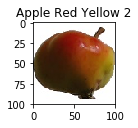

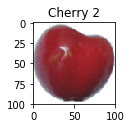

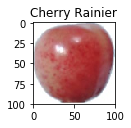

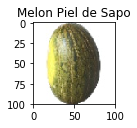

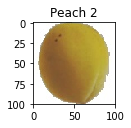

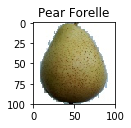

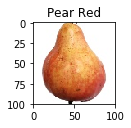

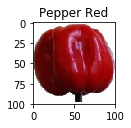

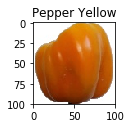

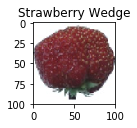

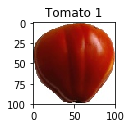

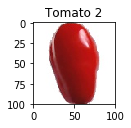

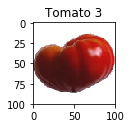

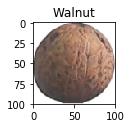

In [23]:
for fruta in frutas:
    pasta_fruta = pasta_treinamento + fruta + "/"
    indice = np.random.randint(0, 90)
    nome_imagem = os.listdir(pasta_fruta)[indice]
    imagem = cv2.imread(pasta_fruta + nome_imagem)
    plotar_imagem(imagem, fruta)

# Preparando os dados

In [28]:
x_train = []
y_train = []
for fruta, id_fruta in fruta2id.items():
    for nome_imagem in os.listdir(pasta_treinamento + fruta):
        imagem = cv2.imread(pasta_treinamento + fruta + "/" + nome_imagem)
        x_train.append(imagem)
        y_train.append(id_fruta)
x_train = np.array(x_train)
y_train = np.array(y_train)
print(x_train.shape)
print(y_train.shape)

(9945, 100, 100, 3)
(9945,)


In [32]:
pasta_teste = "fruits-360/Test/"

x_test = []
y_test = []
for fruta, id_fruta in fruta2id.items():
    for nome_imagem in os.listdir(pasta_teste + fruta):
        imagem = cv2.imread(pasta_teste + fruta + "/" + nome_imagem)
        x_test.append(imagem)
        y_test.append(id_fruta)
x_test = np.array(x_test)
y_test = np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(3315, 100, 100, 3)
(3315,)


# Train-validation-test split
### O dataset já vem com o conjunto de teste, então separamos o conjunto de treinamento em treinamento e validação

In [33]:
from sklearn.model_selection import train_test_split

In [35]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.3, stratify=y_train)

In [36]:
x_train.shape

(6961, 100, 100, 3)

In [37]:
x_val.shape

(2984, 100, 100, 3)

In [38]:
y_train.shape

(6961,)

In [39]:
y_val.shape

(2984,)

In [40]:
np.savez("frutas.npz", x_train=x_train, x_val=x_val, x_test=x_test, y_train=y_train, y_val=y_val, y_test=y_test)

In [43]:
with open("fruta2id.json", mode='w') as f:
    json.dump(fruta2id, f)